<a href="https://colab.research.google.com/github/ujjalkumarmaity/Loan_Predction/blob/master/basic2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data = pd.read_csv('/content/drive/My Drive/project/clean.csv')

In [0]:
data.drop(['purpose','earliest_cr_line'],axis=1,inplace=True)
data.dropna(inplace=True)

In [0]:
from sklearn.preprocessing import LabelEncoder
lst = ['term','home_ownership','verification_status']
for i in lst:
    val = LabelEncoder()
    val.fit(data[i])
    data[i] = val.fit_transform(data[i])


In [0]:
data.shape

(1226677, 21)

In [0]:
X = data.drop('loan_status',axis=1)
y = data['loan_status']

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size =0.3,stratify =y)

In [0]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Decision Tree

testing= 0.700092933772459
traing= 1.0
testing AUC: 0.542
training AUC: 1.000


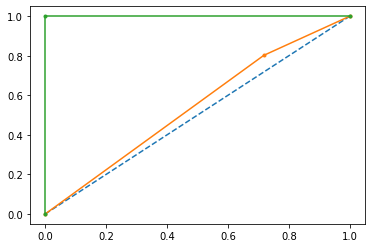

In [0]:
'''
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
avg = 0
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    avg += score
    print('accuracy_score',score)
    i+=1
print('\naverage score = ',avg/5)'''
model = tree.DecisionTreeClassifier(random_state=1)   
model.fit(x_train, y_train)     
pred1 = model.predict(x_test) 
print('testing=',accuracy_score(y_test,pred1))
pred1 = model.predict(x_train) 
print('traing=',accuracy_score(y_train,pred1))

# get AucScore and auc curve
probs = model.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('testing AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
probs = model.predict_proba(x_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('training AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

# New Section

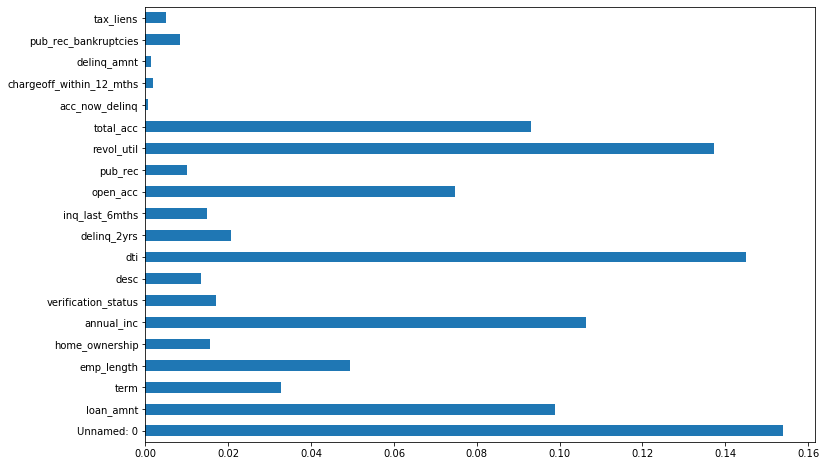

In [0]:
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

# KNN classifier

testing= 0.7803964087346876
traing= 0.807172229707933
testing AUC: 0.558
training AUC: 0.746


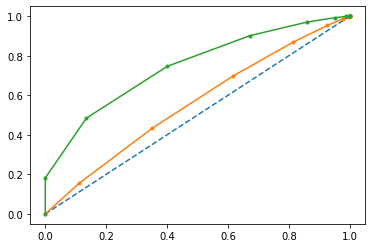

In [0]:
'''
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
avg = 0
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = KNeighborsClassifier(n_neighbors=10)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    avg += score
    print('accuracy_score',score)
    i+=1
print('\naverage score = ',avg/5)'''
model = KNeighborsClassifier(n_neighbors=10)   
model.fit(x_train, y_train)     
pred1 = model.predict(x_test) 
print('testing=',accuracy_score(y_test,pred1))
pred1 = model.predict(x_train) 
print('traing=',accuracy_score(y_train,pred1))

# get AucScore and auc curve
probs = model.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('testing AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
probs = model.predict_proba(x_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('training AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

# Naive Bayes

testing= 0.8031380093694633
traing= 0.803095008227812
testing AUC: 0.603
training AUC: 0.601


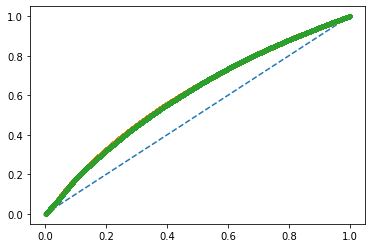

In [0]:


model =GaussianNB()   
model.fit(x_train, y_train)     
pred1 = model.predict(x_test) 
print('testing=',accuracy_score(y_test,pred1))
pred1 = model.predict(x_train) 
print('traing=',accuracy_score(y_train,pred1))

# get AucScore and auc curve
probs = model.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('testing AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
probs = model.predict_proba(x_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('training AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

# Logistic Regression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


testing= 0.5638416973728546
traing= 0.5633064041841306
testing AUC: 0.621
training AUC: 0.621


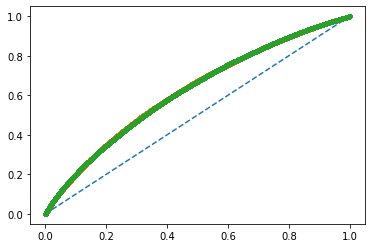

In [0]:


model =LogisticRegression(class_weight='balanced')   
model.fit(x_train, y_train)     
pred1 = model.predict(x_test) 
print('testing=',accuracy_score(y_test,pred1))
pred1 = model.predict(x_train) 
print('traing=',accuracy_score(y_train,pred1))

# get AucScore and auc curve
probs = model.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('testing AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
probs = model.predict_proba(x_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('training AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

# MLP classifier

testing= 0.8035456136346344
traing= 0.8035457036613473
testing AUC: 0.500
training AUC: 0.500


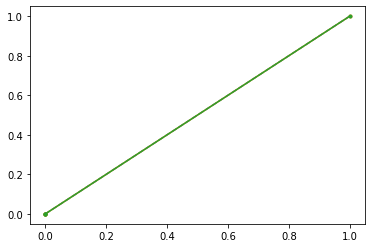

In [0]:


model =MLPClassifier(2)    
model.fit(x_train, y_train)     
pred1 = model.predict(x_test) 
print('testing=',accuracy_score(y_test,pred1))
pred1 = model.predict(x_train) 
print('traing=',accuracy_score(y_train,pred1))

# get AucScore and auc curve
probs = model.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('testing AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
probs = model.predict_proba(x_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('training AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

# Adaboost

testing= 0.8046678840447387
traing= 0.805051515536182
testing AUC: 0.689
training AUC: 0.689


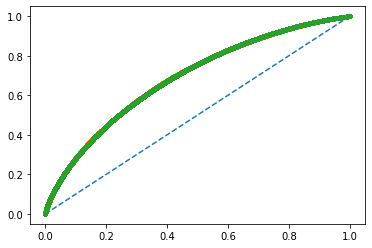

In [0]:

model =AdaBoostClassifier()    
model.fit(x_train, y_train)     
pred1 = model.predict(x_test) 
print('testing=',accuracy_score(y_test,pred1))
pred1 = model.predict(x_train) 
print('traing=',accuracy_score(y_train,pred1))

# get AucScore and auc curve
probs = model.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('testing AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
probs = model.predict_proba(x_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('training AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

# Xgboost

testing= 0.8057004815165053
traing= 0.8058970061944419
testing AUC: 0.695
training AUC: 0.696


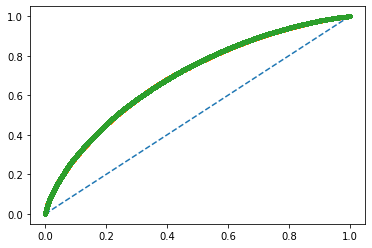

In [0]:

model =GradientBoostingClassifier()   
model.fit(x_train, y_train)     
pred1 = model.predict(x_test) 
print('testing=',accuracy_score(y_test,pred1))
pred1 = model.predict(x_train) 
print('traing=',accuracy_score(y_train,pred1))

# get AucScore and auc curve
probs = model.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('testing AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
probs = model.predict_proba(x_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('training AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

# Random Forest

testing= 0.8035456136346344
traing= 0.8035457036613473
testing AUC: 0.662
training AUC: 0.661


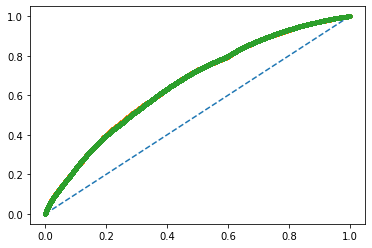

In [0]:

model =RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)    
model.fit(x_train, y_train)     
pred1 = model.predict(x_test) 
print('testing=',accuracy_score(y_test,pred1))
pred1 = model.predict(x_train) 
print('traing=',accuracy_score(y_train,pred1))

# get AucScore and auc curve
probs = model.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('testing AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
probs = model.predict_proba(x_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('training AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

# Linear Discrimnative Analysis

testing= 0.8044423430180107
traing= 0.804073261881997
testing AUC: 0.678
training AUC: 0.678


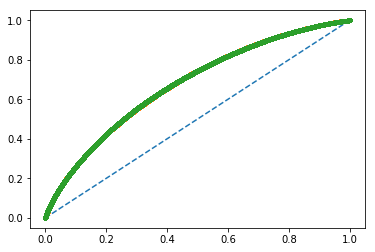

In [0]:


model =LinearDiscriminantAnalysis()    
model.fit(x_train, y_train)     
pred1 = model.predict(x_test) 
print('testing=',accuracy_score(y_test,pred1))
pred1 = model.predict(x_train) 
print('traing=',accuracy_score(y_train,pred1))

# get AucScore and auc curve
probs = model.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('testing AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
probs = model.predict_proba(x_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('training AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

0.7021391071836176
AUC: 0.544


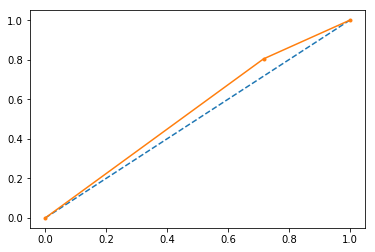

0.7802904316257432
AUC: 0.559


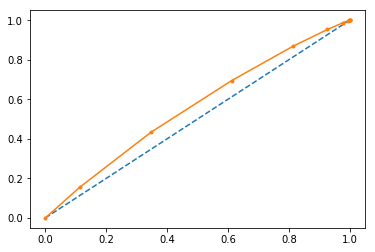

0.803099966304714
AUC: 0.601


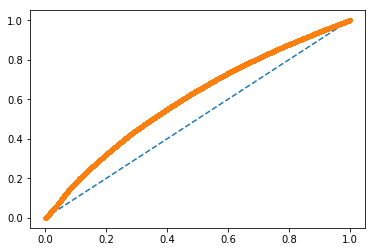

0.8031189878370887
AUC: 0.578


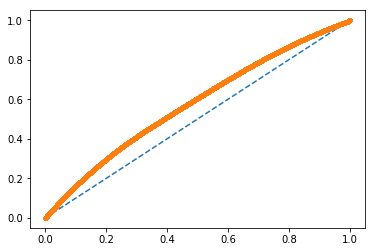

0.8035456136346344
AUC: 0.500


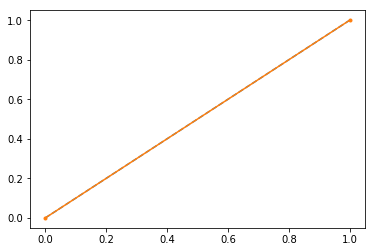

0.8050075542657145
AUC: 0.688


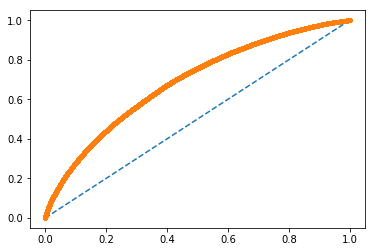

In [0]:
model = tree.DecisionTreeClassifier(random_state=1)     
model.fit(x_train, y_train)     
pred1 = model.predict(x_test) 
print(accuracy_score(y_test,pred1))

# get AucScore and auc curve
probs = model.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()


model = KNeighborsClassifier(n_neighbors=10)
model.fit(x_train, y_train)     
pred2 = model.predict(x_test)     
print(accuracy_score(y_test,pred2))

# get AucScore and auc curve
probs = model.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

model = GaussianNB()
model.fit(x_train, y_train)     
pred3 = model.predict(x_test)     
print(accuracy_score(y_test,pred3))

# get AucScore and auc curve
probs = model.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

model = LogisticRegression() 
model.fit(x_train, y_train)
pred4 = model.predict(x_test)
print(accuracy_score(y_test,pred4))

# get AucScore and auc curve
probs = model.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

model = MLPClassifier(1)
model.fit(x_train, y_train)     
pred5 = model.predict(x_test)
print(accuracy_score(y_test,pred5))
# get AucScore and auc curve
probs = model.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

model = AdaBoostClassifier()
model.fit(x_train, y_train)     
pred6 = model.predict(x_test)
print(accuracy_score(y_test,pred6))
# get AucScore and auc curve
probs = model.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

In [0]:
def AUC_Curve(x_test,y_test):
    

0.8050075542657145
AUC: 0.694


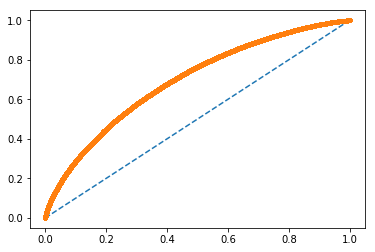

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
model =  GradientBoostingClassifier()
model.fit(x_train, y_train)     
pred7 = model.predict(x_test)
print(accuracy_score(y_test,pred6))
# get AucScore and auc curve
probs = model.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

In [0]:
#lst = list(zip(pred1,pred2,pred3,pred4,pred5,pred6))
lst = list(zip(pred2,pred3,pred4,pred7,pred6,pred1))
df = pd.DataFrame(lst)

In [0]:
def classify(data,c=3):
    value = data.values
    n = len(value)
    m = len(value[0])
    lst = []
    for i in range(n):
        count=0
        for j in range(m):
            if value[i,j]==1:
                count+=1
        if count >= c:
            lst.append(1)
        else:
            lst.append(0)
    arr = np.array(lst)
    arr.reshape(n,)
    return arr

In [0]:
pred = classify(df,c=6)

In [0]:
accuracy_score(y_test,pred)

0.6840034347452745

In [0]:
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
metrics.auc(fpr, tpr)

0.5600381413900708

In [0]:
count=0
for i in pred7:
    if i==1:
        count+=1
n = len(pred)
count/n

0.9854566798186977

# applying stacking 

In [0]:
model = LogisticRegression() 
model.fit(x_train, y_train)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
print(accuracy_score(y_test,pred4))

/home/curaj/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8037494157672199


In [0]:
x_train.insert(loc=1,column='pred',value=pred_train)
x_test.insert(loc=1,column='pred',value=pred_test)

In [0]:
model = MLPClassifier(1)
model.fit(x_train, y_train)     
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
print(accuracy_score(y_test,pred_test))

0.8042385408854251


In [0]:
x_train.insert(loc=1,column='pred2',value=pred_train)
x_test.insert(loc=1,column='pred2',value=pred_test)

In [0]:
model = LogisticRegression() 
model.fit(x_train, y_train)
pred = model.predict(x_test)
print(accuracy_score(y_test,pred))

/home/curaj/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8040782165411245


In [0]:
x_train.drop('Unnamed: 0',axis=1,inplace=True)
x_test.drop('Unnamed: 0',axis=1,inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [0]:
model = AdaBoostClassifier()
model.fit(x_train, y_train)     
pred6 = model.predict(x_test)
print(accuracy_score(y_test,pred6))

0.8052521168248171


# SMOTE

In [0]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
xx,yy =sm.fit_resample(x_train,y_train)

In [0]:
len(xx)

1379942

In [0]:
len(x_train)

858673

0.7815648742948447
AUC: 0.657


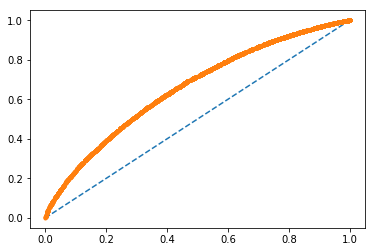

In [0]:
model = AdaBoostClassifier()
model.fit(xx, yy)     
pred6 = model.predict(x_test)
print(accuracy_score(y_test,pred6))
# get AucScore and auc curve
probs = model.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

0.8042303888001218
AUC: 0.681


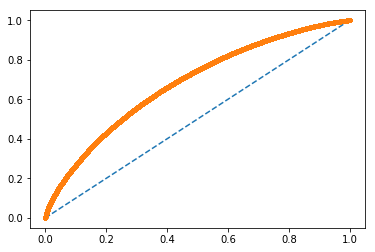

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
model =  GradientBoostingClassifier()
model.fit(xx, yy)     
pred6 = model.predict(x_test)
print(accuracy_score(y_test,pred6))
# get AucScore and auc curve
probs = model.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

# undersampleing

In [0]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=41)
xx1,yy1 =sm.fit_resample(x_train,y_train)

0.7815648742948447
AUC: 0.657


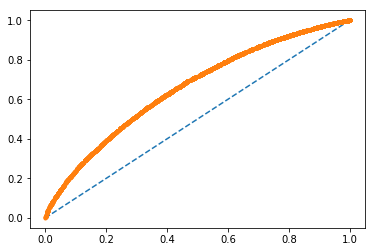

In [0]:
model = AdaBoostClassifier()
model.fit(xx1, yy1)     
pred6 = model.predict(x_test)
print(accuracy_score(y_test,pred6))
# get AucScore and auc curve
probs = model.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

In [0]:
len(yy1)

1379456